# Цель:
Вспомнить и применить знания, полученные на протяжении всего курса. Получить полноценную работу, объединяющую в себе основные методики по работе с данными и алгоритмы машинного обучения.
#Описание задания:
В лабораторной работе предлагается решить задачу классификации. Данные для выполнения работы можно скачать по ссылке, нажав на Data Folder. В датасете находится информация о флаге и базовых показателях страны. На основе доступной информации решается задача классификации стран по религии. Целевой признак мультиклассовый – religion. Остальные признаки описывают характерные черты флага и самой страны. Подробное описание признаков и их возможные значения можно прочесть на сайте.

## Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [26]:
# импорт необходимых библиотек

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# заголовки
headers = ['name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 
           'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses', 
           'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright']

In [28]:
# читаем файл
data = pd.read_csv('flag.data', names=headers)
data

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Western-Samoa,6,3,3,0,1,1,0,0,3,...,0,1,5,0,0,0,0,0,blue,red
190,Yugoslavia,3,1,256,22,6,6,0,3,4,...,0,0,1,0,0,0,0,0,blue,red
191,Zaire,4,2,905,28,10,5,0,0,4,...,0,0,0,0,0,1,1,0,green,green
192,Zambia,4,2,753,6,10,5,3,0,4,...,0,0,0,0,0,0,1,0,green,brown


## Проведите первичный разведочный анализ данных.
a) Проверьте данные на пропуски.

b) Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

c) Визуализируйте распределение количества флагов по религиям.

### a) Проверьте данные на пропуски.

In [29]:
# смотрим на количество пропусков по всем столбцам
data.isnull().sum()

name          0
landmass      0
zone          0
area          0
population    0
language      0
religion      0
bars          0
stripes       0
colours       0
red           0
green         0
blue          0
gold          0
white         0
black         0
orange        0
mainhue       0
circles       0
crosses       0
saltires      0
quarters      0
sunstars      0
crescent      0
triangle      0
icon          0
animate       0
text          0
topleft       0
botright      0
dtype: int64

Пропусков не обнаружено

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        194 non-null    object
 1   landmass    194 non-null    int64 
 2   zone        194 non-null    int64 
 3   area        194 non-null    int64 
 4   population  194 non-null    int64 
 5   language    194 non-null    int64 
 6   religion    194 non-null    int64 
 7   bars        194 non-null    int64 
 8   stripes     194 non-null    int64 
 9   colours     194 non-null    int64 
 10  red         194 non-null    int64 
 11  green       194 non-null    int64 
 12  blue        194 non-null    int64 
 13  gold        194 non-null    int64 
 14  white       194 non-null    int64 
 15  black       194 non-null    int64 
 16  orange      194 non-null    int64 
 17  mainhue     194 non-null    object
 18  circles     194 non-null    int64 
 19  crosses     194 non-null    int64 
 20  saltires  

In [31]:
# посомтрим сколько уникальных значений в столбце
data['topleft'].unique()

array(['black', 'red', 'green', 'blue', 'white', 'orange', 'gold'],
      dtype=object)

In [32]:
# посомтрим сколько уникальных значений в столбце
data['botright'].unique()

array(['green', 'red', 'white', 'black', 'blue', 'gold', 'orange',
       'brown'], dtype=object)

In [33]:
# посомтрим сколько уникальных значений в столбце
data['mainhue'].unique()

array(['green', 'red', 'blue', 'gold', 'white', 'orange', 'black',
       'brown'], dtype=object)

### c) Визуализируйте распределение количества флагов по религиям.

In [34]:
# Посмотрим на распределение флагов по религиям в числовом виде
data['religion'].value_counts()

1    60
0    40
2    36
5    27
6    15
3     8
4     4
7     4
Name: religion, dtype: int64

In [35]:
#  Для наглядности какая религия под каким номером: 
# 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others

<AxesSubplot:>

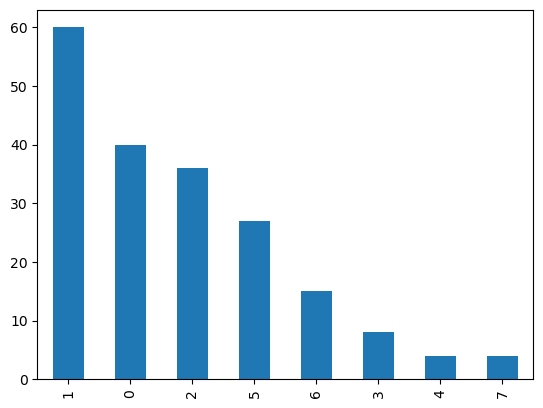

In [36]:
# Визуализация распределения количества флагов по религиям.
data['religion'].value_counts().plot.bar()

### b) Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

<AxesSubplot:xlabel='religion'>

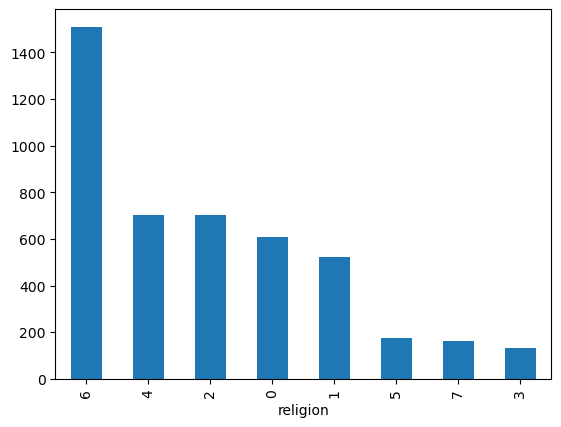

In [37]:
# Распределение Кол-ва людей(в млн.) по религиям

data.groupby('religion').sum()['population'].sort_values(ascending=False).plot.bar()

In [38]:
# Количество людей (в млн.) по религиям в числовом виде
data.groupby('religion').sum()['population'].sort_values(ascending=False)

religion
6    1510
4     702
2     701
0     607
1     524
5     175
7     163
3     132
Name: population, dtype: int64

## Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [39]:
from sklearn.model_selection import train_test_split

X, y = data.drop('religion', axis=1), data['religion']

# преобразуем категориальные переменные в цифровые
X = pd.get_dummies(data=X, columns=['mainhue', 'botright', 'topleft'])

# столбец name удалфем из нашего X, так как для прогноза он не нужен
X = X.drop('name', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

## Обучите любую модель классификации на выбор.

In [40]:
#!pip install xgboost

In [41]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

### Попробую CatBoost

In [42]:
#!pip install CatBoost

In [43]:
from catboost import CatBoostClassifier
ctb = CatBoostClassifier()
ctb.fit(X_train, y_train, silent=True)
ctb_pred = ctb.predict(X_test)

## Для тестового множества сделайте предсказание целевой переменной. Выведите метрики модели с помощью metrics.classification_report. Можно использовать любой другой альтернативный метод подсчета метрик.

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.65      0.92      0.76        12
           2       0.50      0.43      0.46         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.57      0.80      0.67         5
           6       1.00      0.33      0.50         3
           7       0.00      0.00      0.00         1

    accuracy                           0.64        39
   macro avg       0.43      0.40      0.39        39
weighted avg       0.59      0.64      0.59        39



c:\Users\gosha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gosha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gosha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
print(classification_report(y_test, ctb_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.79      0.92      0.85        12
           2       0.62      0.71      0.67         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.67      0.80      0.73         5
           6       0.50      0.33      0.40         3
           7       0.00      0.00      0.00         1

    accuracy                           0.69        39
   macro avg       0.42      0.44      0.42        39
weighted avg       0.63      0.69      0.66        39



c:\Users\gosha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gosha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gosha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Видим что как и в xgboost так и в catboost классы 3,4 и 7 не предсказались вообще, так как недостаточно данных по этим классам.

## Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
a) Сделайте выводы.

In [46]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
landmass,1.000000,-0.615759,0.013279,0.105940,0.496400,0.325073,-0.139290,-0.063375,-0.062856,0.093400,0.026226,-0.177366,-0.080465,-0.004134,-0.058243,0.020744,0.065696,-0.031103,-0.003429,-0.004537,-0.034843,0.168438,-0.033154,0.030359,-0.118856,-0.110743
zone,-0.615759,1.000000,-0.025431,-0.124111,-0.618387,-0.320537,0.085446,0.002359,0.173567,-0.032269,0.069404,0.206066,0.164392,-0.035296,0.026847,0.052239,-0.042542,0.101441,0.179667,0.153300,0.121754,-0.159272,0.060416,-0.048692,0.106034,0.037602
area,0.013279,-0.025431,1.000000,0.519030,-0.027869,0.087941,0.001243,0.028454,-0.162227,-0.005470,-0.081328,-0.080439,0.014500,-0.098135,-0.119825,-0.050718,-0.005652,-0.057888,-0.025492,-0.001968,0.340572,-0.005049,-0.075366,0.026593,-0.051539,0.024423
population,0.105940,-0.124111,0.519030,1.000000,0.062804,0.172731,-0.041392,0.030100,-0.115052,-0.024648,-0.047918,-0.060222,-0.002184,-0.092640,-0.103552,0.050497,0.051257,-0.076305,-0.059061,-0.041349,0.191377,-0.015544,-0.078156,0.017966,-0.082259,-0.025194
language,0.496400,-0.618387,-0.027869,0.062804,1.000000,0.422315,-0.049862,0.105409,-0.197883,-0.011048,0.006046,-0.262201,-0.189429,-0.046823,0.094465,-0.064407,0.098476,-0.210966,-0.296106,-0.220535,-0.126241,0.193375,-0.064845,0.028336,-0.133756,-0.082977
religion,0.325073,-0.320537,0.087941,0.172731,0.422315,1.000000,-0.060000,0.103222,-0.017720,0.121721,0.128843,-0.154891,0.023334,-0.167605,0.074055,-0.051215,0.123260,-0.225238,-0.133373,-0.135713,-0.075081,0.053145,0.056868,0.055714,-0.002741,-0.055158
bars,-0.139290,0.085446,0.001243,-0.041392,-0.049862,-0.060000,1.000000,-0.273371,-0.064574,-0.017093,0.116905,-0.128510,0.037118,-0.198697,-0.029076,0.046841,-0.096650,-0.144432,-0.140070,-0.150604,-0.114667,0.021743,-0.132973,-0.002598,0.016260,0.067709
stripes,-0.063375,0.002359,0.028454,0.030100,0.105409,0.103222,-0.273371,1.000000,0.038278,0.014210,-0.085367,0.126104,-0.031987,0.125907,0.091814,-0.106477,-0.087479,-0.190550,-0.190735,0.091941,0.215486,-0.010242,-0.005719,-0.107426,-0.157922,-0.111564
colours,-0.062856,0.173567,-0.162227,-0.115052,-0.197883,-0.017720,-0.064574,0.038278,1.000000,0.311759,0.428388,0.294779,0.500073,0.214334,0.375794,0.477655,0.178062,0.253827,0.378810,0.187861,0.031008,-0.173644,0.143252,0.505614,0.544576,0.398483
red,0.093400,-0.032269,-0.005470,-0.024648,-0.011048,0.121721,-0.017093,0.014210,0.311759,1.000000,0.031169,-0.204010,0.081769,-0.033483,0.142230,-0.055783,0.108639,0.102772,0.122031,0.119914,0.019726,-0.091458,0.025760,0.097513,0.133648,0.017507


Можно предположить что сильнее всего на наш target влияют столбцы: language, landmass, zone

### Посмотрю как важность признаков распределяет catboost и xgboost

<AxesSubplot:>

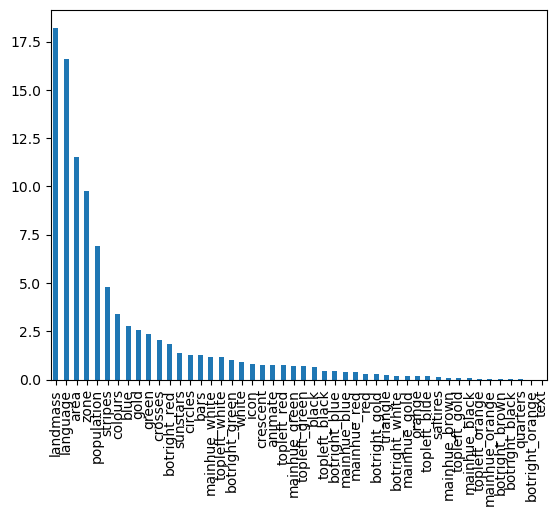

In [47]:
# CATBOOST
features = pd.Series(ctb.feature_importances_)
features.index = pd.Series(X_train.columns)
features.sort_values(ascending=False).plot.bar()

<AxesSubplot:>

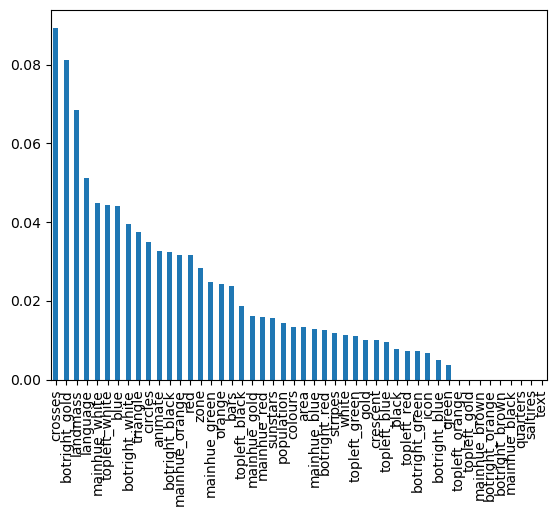

In [48]:
# XGBOOST
features = pd.Series(xgb.feature_importances_)
features.index = pd.Series(X_train.columns)
features.sort_values(ascending=False).plot.bar()

## Обработайте выбросы в данных.
a) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot.

b) Исследуйте признаки на выбросы. Удалите выбросы, если они были найдены/вы считаете это необходимым.

In [49]:
# Список столбцов где количество уникальных значений больше какого-то числа( например 8)
# таким образом я хочу отсеить столбцы которые надо проверять на выбросы
# разумеется точно надо проверять столбцы area и population

list_columns = []
for column in data.select_dtypes('int').columns:
    if len(data[column].unique()) > 8:
        list_columns.append(column)

In [50]:
data[list_columns]

,area,population,language,stripes,sunstars
0,648,16,10,3,1
1,29,3,6,0,1
2,2388,20,8,0,1
3,0,0,1,0,0
4,0,0,6,0,0
...,...,...,...,...,...
189,3,0,1,0,5
190,256,22,6,3,1
191,905,28,10,0,0
192,753,6,10,0,0


In [51]:
for i in list_columns:
  print(i, '\n', data[i].unique(),'\n', '*'*70)

area 
 [  648    29  2388     0  1247  2777  7690    84    19     1   143    31
    23   113    47  1099   600  8512     6   111   274   678    28   474
  9976     4   623  1284   757  9561  1139     2   342    51   115     9
   128    43    22    49   284  1001    21  1222    12    18   337   547
    91   268    10   108   249   239   132  2176   109   246    36   215
   112    93   103  3268  1904  1648   435    70   301   323    11   372
    98   181   583   236    30  1760     3   587   118   333  1240  1031
  1973  1566   447   783   140    41  1267   925   121   195   324   212
   804    76   463   407  1285   300   313    92   237    26  2150   196
    72   637  1221    99   288   505    66  2506    63    17   450   185
   945   514    57     5   164   781   245   178  9363 22402    15   912
   256   905   753   391] 
 **********************************************************************
population 
 [  16    3   20    0    7   28   15    8   90   10    1    6  119    9
   35  

In [52]:
data[(data['sunstars'] == 22) | (data['sunstars'] == 50)]

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
23,Brazil,2,3,8512,119,6,0,0,0,4,...,0,0,22,0,0,0,0,1,green,green
183,USA,1,4,9363,231,1,1,0,13,3,...,0,1,50,0,0,0,0,0,blue,red


Видно что это не выбросы а реальные данные

In [53]:
data[(data['stripes'] == 14) | (data['stripes'] == 13)]

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
105,Malaysia,5,1,333,13,10,2,0,14,4,...,0,1,1,1,0,0,0,0,blue,white
183,USA,1,4,9363,231,1,1,0,13,3,...,0,1,50,0,0,0,0,0,blue,red


Это тоже не выбросы, значит на выбросы остается проверить только area и population

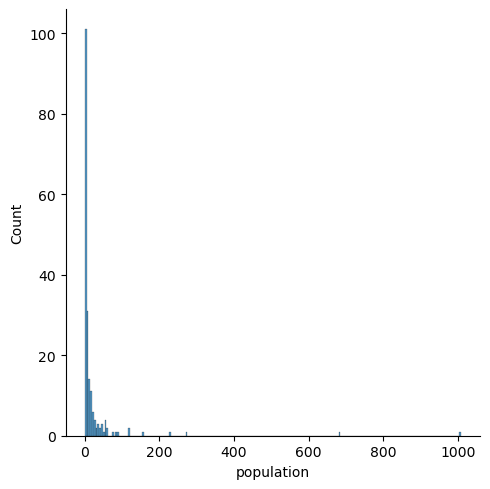

In [54]:
sns.displot(data['population'])

c:\Users\gosha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='population'>

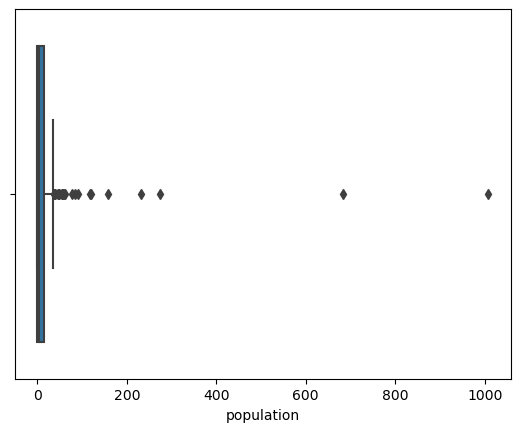

In [55]:
sns.boxplot(data['population'])

In [56]:
data[data['population'] > 100]

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
23,Brazil,2,3,8512,119,6,0,0,0,4,...,0,0,22,0,0,0,0,1,green,green
37,China,5,1,9561,1008,7,6,0,0,2,...,0,0,5,0,0,0,0,0,red,red
81,India,5,1,3268,684,6,4,0,3,4,...,0,0,0,0,0,1,0,0,orange,green
82,Indonesia,6,2,1904,157,10,2,0,2,2,...,0,0,0,0,0,0,0,0,red,white
90,Japan,5,1,372,118,9,7,0,0,2,...,0,0,1,0,0,0,0,0,white,white
183,USA,1,4,9363,231,1,1,0,13,3,...,0,1,50,0,0,0,0,0,blue,red
184,USSR,5,1,22402,274,5,6,0,0,2,...,0,0,1,0,0,1,0,0,red,red


Думаю это не выбрасы, а реальные данные.

In [57]:
data[data['population'] == 0].count()[0]

56

здесь население страны просто очень мало, при округлении до млн. человек дает ноль. Реальные данные.

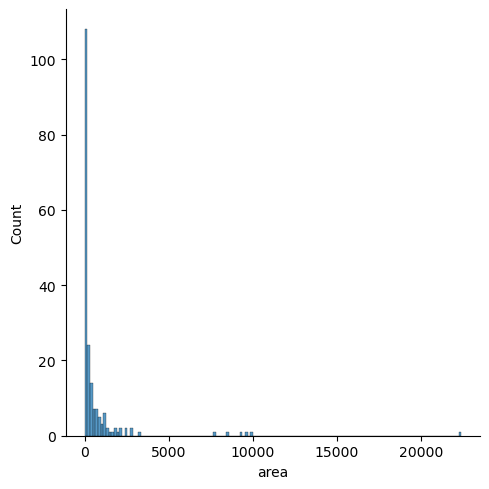

In [58]:
sns.displot(data['area'])

c:\Users\gosha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area'>

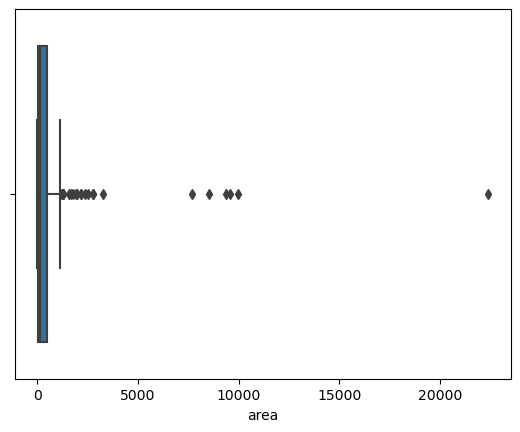

In [59]:
sns.boxplot(data['area'])

In [60]:
data['area'].describe()

count      194.000000
mean       700.046392
std       2170.927932
min          0.000000
25%          9.000000
50%        111.000000
75%        471.250000
max      22402.000000
Name: area, dtype: float64

In [61]:
data[data['area'] > 471]

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
5,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black
8,Argentina,2,3,2777,28,2,0,0,3,2,...,0,0,0,0,0,0,0,0,blue,blue
9,Argentine,2,3,2777,28,2,0,0,3,3,...,0,0,1,0,0,0,0,0,blue,blue
10,Australia,6,2,7690,15,1,1,0,0,3,...,1,1,6,0,0,0,0,0,white,blue
21,Bolivia,2,3,1099,6,2,0,0,3,3,...,0,0,0,0,0,0,0,0,red,green
22,Botswana,4,2,600,1,10,5,0,5,3,...,0,0,0,0,0,0,0,0,blue,blue
23,Brazil,2,3,8512,119,6,0,0,0,4,...,0,0,22,0,0,0,0,1,green,green
28,Burma,5,1,678,35,10,3,0,0,3,...,0,1,14,0,0,1,1,0,blue,red


In [62]:
data[data['area'] == 0]

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
6,Anguilla,1,4,0,0,1,1,0,1,3,...,0,0,0,0,0,0,1,0,white,blue
7,Antigua-Barbuda,1,4,0,0,1,1,0,1,5,...,0,0,1,0,1,0,0,0,black,red
15,Barbados,1,4,0,0,1,1,3,0,3,...,0,0,0,0,0,1,0,0,blue,blue
19,Bermuda,1,4,0,0,1,1,0,0,6,...,1,1,0,0,0,1,1,0,white,red
24,British-Virgin-Isles,1,4,0,0,1,1,0,0,6,...,1,1,0,0,0,1,1,1,white,blue
33,Cayman-Islands,1,4,0,0,1,1,0,0,6,...,1,1,4,0,0,1,1,1,white,blue
41,Cook-Islands,6,3,0,0,1,1,0,0,4,...,1,1,15,0,0,0,0,0,white,blue
48,Dominica,1,4,0,0,1,1,0,0,6,...,0,0,10,0,0,0,1,0,green,green


Это тоже не выбросы, а реальные данные

Таким образом выбросы не найдены.

## Проведите нормализацию признаков.
a) Выберите признаки для нормализации, предложите способы для их обработки.

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
XX = scaler.fit_transform(X[['area', 'population']])
X[['area', 'population']] = XX

## Повторите п. 4, п. 5.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

### XGBoost

In [65]:
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.65      0.92      0.76        12
           2       0.50      0.43      0.46         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.57      0.80      0.67         5
           6       1.00      0.33      0.50         3
           7       0.00      0.00      0.00         1

    accuracy                           0.64        39
   macro avg       0.43      0.40      0.39        39
weighted avg       0.59      0.64      0.59        39



c:\Users\gosha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gosha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gosha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### CATBoost

In [66]:
ctb.fit(X_train, y_train)
ctb_pred = ctb.predict(X_test)
print(classification_report(y_test, ctb_pred))

Learning rate set to 0.07195
0:	learn: 2.0368779	total: 5.35ms	remaining: 5.35s
1:	learn: 1.9801141	total: 10.9ms	remaining: 5.44s
2:	learn: 1.9232988	total: 15.8ms	remaining: 5.26s
3:	learn: 1.8600383	total: 21.2ms	remaining: 5.27s
4:	learn: 1.8165534	total: 26.2ms	remaining: 5.21s
5:	learn: 1.7623116	total: 31.4ms	remaining: 5.21s
6:	learn: 1.7249663	total: 36.5ms	remaining: 5.17s
7:	learn: 1.6836649	total: 41.4ms	remaining: 5.13s
8:	learn: 1.6495157	total: 46.2ms	remaining: 5.09s
9:	learn: 1.6171137	total: 51.1ms	remaining: 5.06s
10:	learn: 1.5825807	total: 56.1ms	remaining: 5.04s
11:	learn: 1.5515705	total: 60.7ms	remaining: 5s
12:	learn: 1.5260426	total: 65.3ms	remaining: 4.95s
13:	learn: 1.4955613	total: 70.7ms	remaining: 4.98s
14:	learn: 1.4623241	total: 75.6ms	remaining: 4.96s
15:	learn: 1.4357552	total: 80.7ms	remaining: 4.96s
16:	learn: 1.4109002	total: 86.2ms	remaining: 4.98s
17:	learn: 1.3914601	total: 90.9ms	remaining: 4.96s
18:	learn: 1.3681234	total: 95.7ms	remaining: 4.

c:\Users\gosha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gosha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gosha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Метрики не улучшились

## Сбалансируйте классы путем oversampling/undersampling.
a) Повторите п. 4, п. 5.

In [67]:
# pip install -U imbalanced-learn

Попробую библиотеку SMOTE 

### Oversampling

In [68]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, k_neighbors=3)
X_train_oversamp, y_train_oversamp = sm.fit_resample(X, y)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_train_oversamp, y_train_oversamp, random_state=42, test_size=0.2, stratify=y_train_oversamp)

In [70]:
# XGBOOST
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.69      0.75      0.72        12
           2       1.00      0.83      0.91        12
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        12
           5       0.86      1.00      0.92        12
           6       1.00      0.92      0.96        12
           7       1.00      1.00      1.00        12

    accuracy                           0.92        96
   macro avg       0.92      0.92      0.92        96
weighted avg       0.92      0.92      0.92        96



In [71]:
print(classification_report(y_train, xgb.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        48
           3       1.00      1.00      1.00        48
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        48
           6       1.00      1.00      1.00        48
           7       1.00      1.00      1.00        48

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



In [72]:
# CATBOOST
ctb.fit(X_train, y_train)
ctb_pred = ctb.predict(X_test)

Learning rate set to 0.075357
0:	learn: 2.0330865	total: 8.06ms	remaining: 8.05s
1:	learn: 1.9748462	total: 16.7ms	remaining: 8.35s
2:	learn: 1.9319309	total: 26.4ms	remaining: 8.78s
3:	learn: 1.8660871	total: 37.4ms	remaining: 9.32s
4:	learn: 1.8018212	total: 46.7ms	remaining: 9.3s
5:	learn: 1.7474485	total: 55.4ms	remaining: 9.18s
6:	learn: 1.6971328	total: 64.8ms	remaining: 9.2s
7:	learn: 1.6456964	total: 72.6ms	remaining: 9s
8:	learn: 1.5991847	total: 80.2ms	remaining: 8.83s
9:	learn: 1.5503820	total: 87.7ms	remaining: 8.68s
10:	learn: 1.5066570	total: 96.7ms	remaining: 8.69s
11:	learn: 1.4678888	total: 105ms	remaining: 8.66s
12:	learn: 1.4283228	total: 113ms	remaining: 8.58s
13:	learn: 1.4010868	total: 121ms	remaining: 8.49s
14:	learn: 1.3595362	total: 128ms	remaining: 8.4s
15:	learn: 1.3242165	total: 135ms	remaining: 8.3s
16:	learn: 1.2968647	total: 143ms	remaining: 8.28s
17:	learn: 1.2594718	total: 151ms	remaining: 8.21s
18:	learn: 1.2339036	total: 158ms	remaining: 8.14s
19:	lea

In [73]:
print(classification_report(y_test, ctb_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.90      0.75      0.82        12
           2       0.91      0.83      0.87        12
           3       1.00      1.00      1.00        12
           4       1.00      0.92      0.96        12
           5       0.80      1.00      0.89        12
           6       0.92      1.00      0.96        12
           7       1.00      1.00      1.00        12

    accuracy                           0.93        96
   macro avg       0.93      0.93      0.93        96
weighted avg       0.93      0.93      0.93        96



In [74]:
print(classification_report(y_train, ctb.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        48
           3       1.00      1.00      1.00        48
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        48
           6       1.00      1.00      1.00        48
           7       1.00      1.00      1.00        48

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



Возможно модели немного переобучены

### Undersampling

In [75]:
from imblearn.under_sampling import RandomUnderSampler
rand = RandomUnderSampler()
X_under, y_under = rand.fit_resample(X, y)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, random_state=42, test_size=0.3, stratify=y_under)

In [77]:
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       1.00      0.50      0.67         2
           7       0.00      0.00      0.00         1

    accuracy                           0.20        10
   macro avg       0.19      0.19      0.17        10
weighted avg       0.25      0.20      0.20        10



c:\Users\gosha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gosha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gosha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
ctb.fit(X_train, y_train)
ctb_pred = ctb.predict(X_test)

Learning rate set to 0.065131
0:	learn: 2.0609311	total: 5.15ms	remaining: 5.15s
1:	learn: 2.0479419	total: 20.2ms	remaining: 10.1s
2:	learn: 2.0301831	total: 25.1ms	remaining: 8.36s
3:	learn: 2.0176528	total: 42.4ms	remaining: 10.6s
4:	learn: 1.9999853	total: 51.8ms	remaining: 10.3s
5:	learn: 1.9833442	total: 61.3ms	remaining: 10.1s
6:	learn: 1.9612533	total: 72.3ms	remaining: 10.3s
7:	learn: 1.9459554	total: 81.8ms	remaining: 10.1s
8:	learn: 1.9289832	total: 90.5ms	remaining: 9.96s
9:	learn: 1.9126297	total: 100ms	remaining: 9.94s
10:	learn: 1.8990444	total: 111ms	remaining: 10s
11:	learn: 1.8848354	total: 122ms	remaining: 10s
12:	learn: 1.8673854	total: 133ms	remaining: 10.1s
13:	learn: 1.8521572	total: 143ms	remaining: 10.1s
14:	learn: 1.8379134	total: 153ms	remaining: 10.1s
15:	learn: 1.8151368	total: 157ms	remaining: 9.64s
16:	learn: 1.8005035	total: 167ms	remaining: 9.65s
17:	learn: 1.7859568	total: 178ms	remaining: 9.72s
18:	learn: 1.7727509	total: 188ms	remaining: 9.73s
19:	le

In [79]:
print(classification_report(y_test, ctb_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       1.00      0.50      0.67         2
           7       0.00      0.00      0.00         1

    accuracy                           0.20        10
   macro avg       0.19      0.19      0.17        10
weighted avg       0.25      0.20      0.20        10



c:\Users\gosha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gosha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gosha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


При undersampling данных явно мало

## Уменьшите размерность пространства признаков.
a) Повторите п. 4, п. 5.

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

Хочу попробовать уменьшить признаковое пространство по features_impotance моделей

In [81]:
ctb.fit(X_train, y_train)

Learning rate set to 0.07195
0:	learn: 2.0368779	total: 6.01ms	remaining: 6s
1:	learn: 1.9801141	total: 12.6ms	remaining: 6.28s
2:	learn: 1.9232988	total: 18.7ms	remaining: 6.21s
3:	learn: 1.8600383	total: 25.9ms	remaining: 6.46s
4:	learn: 1.8165534	total: 31.7ms	remaining: 6.31s
5:	learn: 1.7623116	total: 36.8ms	remaining: 6.1s
6:	learn: 1.7249663	total: 41.7ms	remaining: 5.91s
7:	learn: 1.6836649	total: 46.9ms	remaining: 5.82s
8:	learn: 1.6495157	total: 52.4ms	remaining: 5.77s
9:	learn: 1.6171137	total: 57.2ms	remaining: 5.66s
10:	learn: 1.5825807	total: 62.2ms	remaining: 5.59s
11:	learn: 1.5515705	total: 67.2ms	remaining: 5.53s
12:	learn: 1.5260426	total: 72.4ms	remaining: 5.5s
13:	learn: 1.4955613	total: 78ms	remaining: 5.49s
14:	learn: 1.4623241	total: 82.9ms	remaining: 5.45s
15:	learn: 1.4357552	total: 87.7ms	remaining: 5.39s
16:	learn: 1.4109002	total: 92.9ms	remaining: 5.37s
17:	learn: 1.3914601	total: 98ms	remaining: 5.35s
18:	learn: 1.3681234	total: 103ms	remaining: 5.31s
19:

<AxesSubplot:>

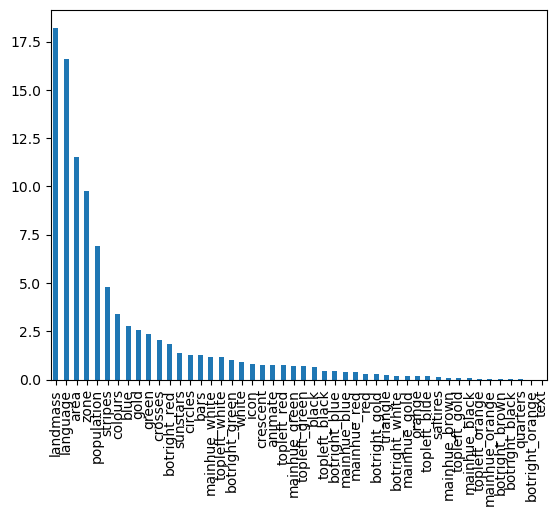

In [82]:
features = pd.Series(ctb.feature_importances_)
features.index = pd.Series(X_train.columns)
features.sort_values(ascending=False).plot.bar()

Возьму по некоторому значению первых признаков, найду пересечение и оставлю признаки только вошедшие и туда и туда

In [83]:
ctb_index = features[features > 0.7].index.tolist()
ctb_index

['landmass',
 'zone',
 'area',
 'population',
 'language',
 'bars',
 'stripes',
 'colours',
 'green',
 'blue',
 'gold',
 'white',
 'circles',
 'crosses',
 'sunstars',
 'crescent',
 'icon',
 'animate',
 'mainhue_green',
 'mainhue_white',
 'botright_green',
 'botright_red',
 'topleft_green',
 'topleft_red',
 'topleft_white']

<AxesSubplot:>

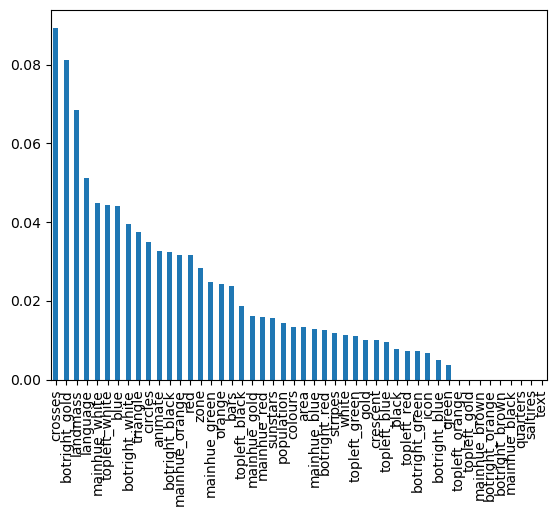

In [84]:
xgb.fit(X_train, y_train)
features = pd.Series(xgb.feature_importances_)
features.index = pd.Series(X_train.columns)
features.sort_values(ascending=False).plot.bar()

In [85]:
xgb_index = features.sort_values(ascending=False)[: len(ctb_index)].index.tolist()

In [86]:
new_index = set(ctb_index) & set(xgb_index)
new_index

{'animate',
 'area',
 'bars',
 'blue',
 'circles',
 'colours',
 'crosses',
 'landmass',
 'language',
 'mainhue_green',
 'mainhue_white',
 'population',
 'sunstars',
 'topleft_white',
 'zone'}

Осталось всего 15 признаков, попробую на них обучить модели

In [87]:
new_X = X[new_index]

C:\Users\gosha\AppData\Local\Temp\ipykernel_2736\1750534661.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  new_X = X[new_index]


In [88]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, random_state=42, test_size=0.2, stratify=y)

Обучу модели на новых признаках

In [89]:
ctb.fit(X_train, y_train)
ctb_pred = ctb.predict(X_test)

Learning rate set to 0.07195
0:	learn: 2.0181620	total: 2.74ms	remaining: 2.73s
1:	learn: 1.9569796	total: 4.86ms	remaining: 2.42s
2:	learn: 1.9110665	total: 7.41ms	remaining: 2.46s
3:	learn: 1.8411469	total: 9.82ms	remaining: 2.44s
4:	learn: 1.8001342	total: 12.1ms	remaining: 2.41s
5:	learn: 1.7617249	total: 14.8ms	remaining: 2.45s
6:	learn: 1.7163655	total: 17.1ms	remaining: 2.43s
7:	learn: 1.6650371	total: 19.3ms	remaining: 2.4s
8:	learn: 1.6327074	total: 21.4ms	remaining: 2.35s
9:	learn: 1.5916404	total: 23.7ms	remaining: 2.35s
10:	learn: 1.5551963	total: 25.9ms	remaining: 2.32s
11:	learn: 1.5101844	total: 28ms	remaining: 2.31s
12:	learn: 1.4616622	total: 30.3ms	remaining: 2.3s
13:	learn: 1.4351137	total: 32.5ms	remaining: 2.29s
14:	learn: 1.4053497	total: 34.7ms	remaining: 2.28s
15:	learn: 1.3792318	total: 37ms	remaining: 2.27s
16:	learn: 1.3528583	total: 39.4ms	remaining: 2.28s
17:	learn: 1.3331583	total: 41.7ms	remaining: 2.27s
18:	learn: 1.3139047	total: 43.8ms	remaining: 2.26s

In [90]:
print(classification_report(y_test, ctb_pred))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.77      0.83      0.80        12
           2       0.67      0.86      0.75         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.75      0.60      0.67         5
           6       0.50      0.33      0.40         3
           7       0.00      0.00      0.00         1

    accuracy                           0.69        39
   macro avg       0.42      0.44      0.42        39
weighted avg       0.63      0.69      0.66        39



c:\Users\gosha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gosha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gosha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.73      0.92      0.81        12
           2       0.57      0.57      0.57         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.50      0.80      0.62         5
           6       1.00      0.33      0.50         3
           7       0.00      0.00      0.00         1

    accuracy                           0.67        39
   macro avg       0.44      0.42      0.41        39
weighted avg       0.62      0.67      0.62        39



c:\Users\gosha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gosha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gosha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Метрики не изменились по сравнению с изначальными моделями

Попробую отобрать признаки с помощью библиотеки SHAP

In [92]:
# pip install shap

In [93]:
import shap

Обучу catboost на полном наборе признаков

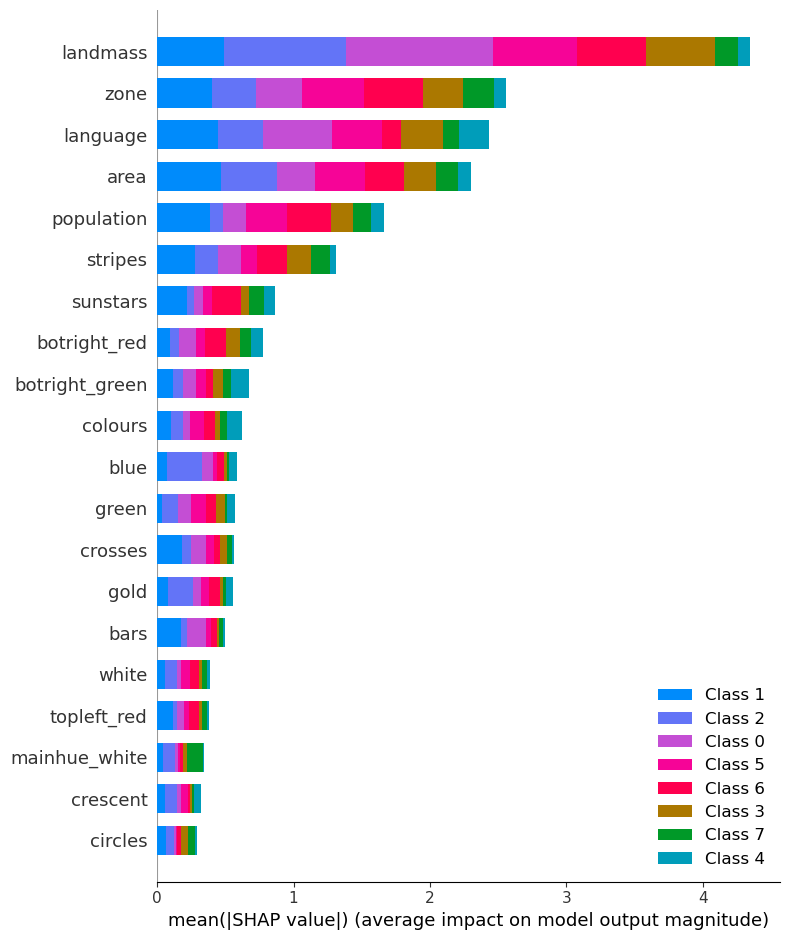

In [94]:
ctb.fit(X, y, silent=True)
explainer = shap.TreeExplainer(ctb)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

Выведу наиоболее важные признаки

In [95]:
# функция русиет график важности признаков модели по убываю
def plot_features_importances(model, X):
    features = pd.Series(model.feature_importances_)
    features.index = pd.Series(X.columns)
    features.sort_values(ascending=False).plot.bar()

In [96]:
# функция возвращает топ n важных признаков по версии SHAP
def get_top_features(shap_values, X, n):
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X.columns, sum(vals))), columns=['col_name','feature_importance_vals'])
    feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)
    top_n_features = feature_importance['col_name'][:n]
    return top_n_features

top_n_features_ctb = get_top_features(shap_values, X, 20)

In [97]:
new_X = X[top_n_features_ctb]

X_train, X_test, y_train, y_test = train_test_split(new_X, y, random_state=42, test_size=0.2, stratify=y)

Обучу модель на новых признаках и посмотрю метрики

In [98]:
ctb.fit(X_train, y_train, silent=True)
ctb_pred = ctb.predict(X_test)
print(classification_report(y_test, ctb_pred))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.71      0.83      0.77        12
           2       0.71      0.71      0.71         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.67      0.80      0.73         5
           6       0.50      0.33      0.40         3
           7       0.00      0.00      0.00         1

    accuracy                           0.67        39
   macro avg       0.41      0.43      0.41        39
weighted avg       0.61      0.67      0.63        39



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Метрика немного ухудшилась

Попробую для xgboost

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


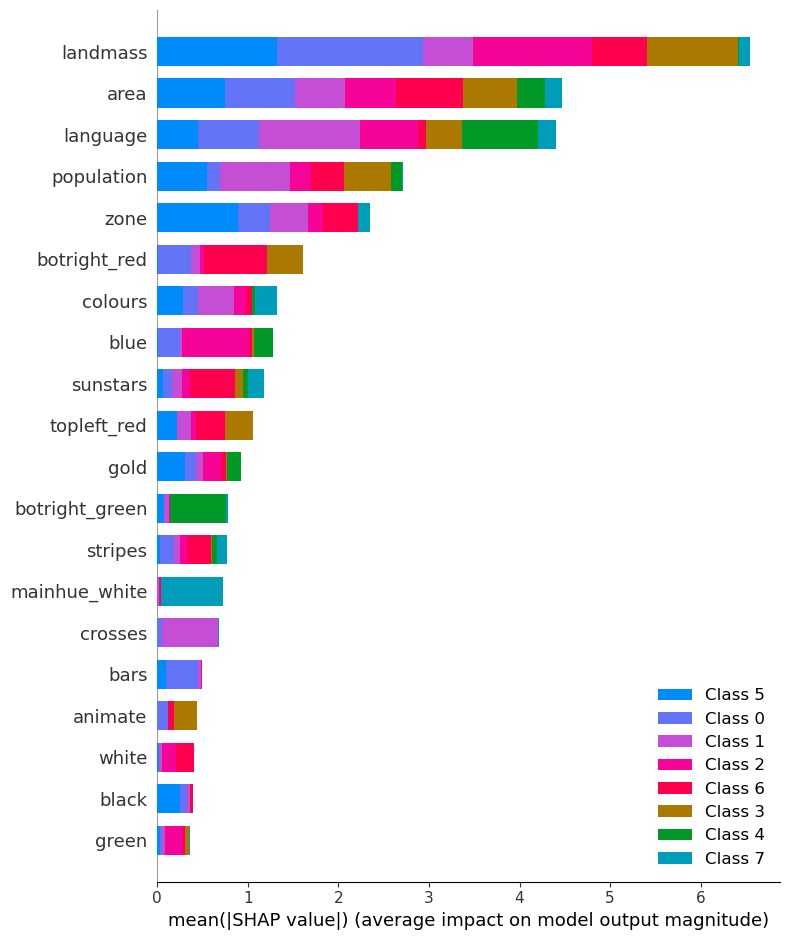

In [99]:
xgb.fit(X, y)
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

In [100]:
top_n_features_xgb = get_top_features(shap_values, X, 20)

In [101]:
new_X = X[top_n_features_xgb]

X_train, X_test, y_train, y_test = train_test_split(new_X, y, random_state=42, test_size=0.2, stratify=y)

In [102]:
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.75      1.00      0.86        12
           2       0.50      0.43      0.46         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.57      0.80      0.67         5
           6       0.33      0.33      0.33         3
           7       0.00      0.00      0.00         1

    accuracy                           0.67        39
   macro avg       0.38      0.41      0.39        39
weighted avg       0.60      0.67      0.62        39



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Метрика не изменилась

Теперь попробую найти пересечения двух списков лучших признаков и обучить модели на нём

In [103]:
top_features = set(top_n_features_ctb) & set(top_n_features_xgb)

In [104]:
top_features = X[top_features]

X_train, X_test, y_train, y_test = train_test_split(top_features, y, random_state=42, test_size=0.2, stratify=y)

ctb.fit(X_train, y_train, silent=True)
ctb_pred = ctb.predict(X_test)
print(classification_report(y_test, ctb_pred))

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print(classification_report(y_test, xgb_pred))

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.


              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.67      0.83      0.74        12
           2       0.80      0.57      0.67         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.75      0.60      0.67         5
           6       0.33      0.33      0.33         3
           7       0.00      0.00      0.00         1

    accuracy                           0.62        39
   macro avg       0.40      0.39      0.39        39
weighted avg       0.61      0.62      0.60        39

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.79      0.92      0.85        12
           2       0.57      0.57      0.57         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.50 

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


У catboost метрика снизилась еще больше, у xgb не изменилась.

## Примените любой метод на ваше усмотрение для отбора признаков.
a) Повторите п. 4, п. 5. Укажите количество выбранных признаков.

Воспользуюсь классом SequentialFeatureSelector

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

Код ниже не выполняется, вылетает ошибка

In [106]:
from sklearn.feature_selection import SequentialFeatureSelector

# ctb = CatBoostClassifier(silent=True)
# sfs = SequentialFeatureSelector(ctb, direction = 'forward', n_jobs=-1, n_features_to_select=8, cv=2)
 
# sfs.fit(X, y)
# # X, y – входные и выходные данные соответственно.
# # X_train – входные данные с обучающейся выборки,
# # y_pred – выходные данные предиктора
# seq_X = sfs.transform(X)

# X_train, X_test, y_train, y_test = train_test_split(seq_X, y, random_state=42, test_size=0.2, stratify=y)
# ctb.fit(X_train, y_train)
# ctb_pred = ctb.predict(X_test)
# print(classification_report(y_test, xgb_pred))

In [107]:
xgb = XGBClassifier()
sfs = SequentialFeatureSelector(xgb, direction = 'forward', n_jobs=-1, n_features_to_select=18, cv=4)
 
sfs.fit(X, y)
# X, y – входные и выходные данные соответственно.
# X_train – входные данные с обучающейся выборки,
# y_pred – выходные данные предиктора
seq_X = sfs.transform(X)

X_train, X_test, y_train, y_test = train_test_split(seq_X, y, random_state=42, test_size=0.2, stratify=y)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.79      0.92      0.85        12
           2       0.75      0.43      0.55         7
           3       0.40      1.00      0.57         2
           4       0.00      0.00      0.00         1
           5       0.57      0.80      0.67         5
           6       0.50      0.33      0.40         3
           7       0.00      0.00      0.00         1

    accuracy                           0.69        39
   macro avg       0.48      0.53      0.48        39
weighted avg       0.68      0.69      0.67        39



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Метрика подросла, помимо этого начал предсказываться класс 3

In [108]:
xgb = XGBClassifier()
sfs = SequentialFeatureSelector(xgb, direction = 'backward', n_jobs=-1, n_features_to_select=18, cv=4)
 
sfs.fit(X, y)
# X, y – входные и выходные данные соответственно.
# X_train – входные данные с обучающейся выборки,
# y_pred – выходные данные предиктора
seq_X = sfs.transform(X)

X_train, X_test, y_train, y_test = train_test_split(seq_X, y, random_state=42, test_size=0.2, stratify=y)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.80      1.00      0.89        12
           2       0.57      0.57      0.57         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.43      0.60      0.50         5
           6       0.50      0.33      0.40         3
           7       0.00      0.00      0.00         1

    accuracy                           0.67        39
   macro avg       0.39      0.41      0.40        39
weighted avg       0.62      0.67      0.64        39



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


попробую catboost на данных от xgb

In [109]:
ctb.fit(X_train, y_train, silent=True)
ctb_pred = ctb.predict(X_test)
print(classification_report(y_test, ctb_pred))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.67      0.83      0.74        12
           2       0.62      0.71      0.67         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.67      0.40      0.50         5
           6       0.50      0.33      0.40         3
           7       0.00      0.00      0.00         1

    accuracy                           0.62        39
   macro avg       0.38      0.38      0.37        39
weighted avg       0.56      0.62      0.58        39



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Что-то тут не так

In [ ]:
# ctb = CatBoostClassifier(silent=True)
# sfs = SequentialFeatureSelector(ctb, direction = 'backward', n_jobs=-1, n_features_to_select=18, cv=4)
 
# sfs.fit(X, y)
# seq_X = sfs.transform(X)

# X_train, X_test, y_train, y_test = train_test_split(seq_X, y, random_state=42, test_size=0.2, stratify=y)
# ctb.fit(X_train, y_train)
# ctb_pred = ctb.predict(X_test)
# print(classification_report(y_test, xgb_pred))

Попробую SelectKBest

In [112]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [113]:
X_new = SelectKBest(f_classif, k=30).fit_transform(X, y)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=42, test_size=0.2, stratify=y)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.79      0.92      0.85        12
           2       0.60      0.43      0.50         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.40      0.40      0.40         5
           6       0.33      0.67      0.44         3
           7       0.00      0.00      0.00         1

    accuracy                           0.62        39
   macro avg       0.36      0.40      0.37        39
weighted avg       0.58      0.62      0.59        39



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [115]:
ctb.fit(X_train, y_train)
ctb_pred = ctb.predict(X_test)
print(classification_report(y_test, ctb_pred))

              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.73      0.92      0.81        12
           2       0.62      0.71      0.67         7
           3       1.00      0.50      0.67         2
           4       0.00      0.00      0.00         1
           5       0.67      0.40      0.50         5
           6       0.40      0.67      0.50         3
           7       0.00      0.00      0.00         1

    accuracy                           0.67        39
   macro avg       0.52      0.48      0.48        39
weighted avg       0.65      0.67      0.64        39



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Попробую поиграться с SMOTE еще раз

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)


In [117]:
y.value_counts()

1    60
0    40
2    36
5    27
6    15
3     8
4     4
7     4
Name: religion, dtype: int64

In [118]:
d = {1:60, 0:40, 2:50, 5:27, 6:25, 3:20, 4:15, 7:15}

In [119]:
sm = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)
X_sm, y_sm = sm.fit_resample(X,y)

In [120]:
y_sm.value_counts()

2    60
6    60
1    60
0    60
5    60
3    60
4    60
7    60
Name: religion, dtype: int64

In [121]:
all(y_sm[y_sm == 1] == y[y == 1])

True

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, random_state=42, test_size=0.2, stratify=y_sm)

In [123]:
ctb.fit(X_train, y_train, silent=True)
ctb_pred = ctb.predict(X_test)
print(classification_report(y_test, ctb_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.90      0.75      0.82        12
           2       0.91      0.83      0.87        12
           3       1.00      1.00      1.00        12
           4       1.00      0.92      0.96        12
           5       0.80      1.00      0.89        12
           6       0.92      1.00      0.96        12
           7       1.00      1.00      1.00        12

    accuracy                           0.93        96
   macro avg       0.93      0.93      0.93        96
weighted avg       0.93      0.93      0.93        96



In [124]:
print(classification_report(y_train, ctb.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        48
           3       1.00      1.00      1.00        48
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        48
           6       1.00      1.00      1.00        48
           7       1.00      1.00      1.00        48

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



In [125]:
ctb = CatBoostClassifier(learning_rate=0.005, silent=True)
ctb.fit(X_train, y_train)
ctb_pred = ctb.predict(X_test)
print(classification_report(y_test, ctb_pred))
print(classification_report(y_train, ctb.predict(X_train)))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       1.00      0.67      0.80        12
           2       0.85      0.92      0.88        12
           3       0.92      1.00      0.96        12
           4       1.00      0.92      0.96        12
           5       0.80      1.00      0.89        12
           6       0.77      0.83      0.80        12
           7       1.00      1.00      1.00        12

    accuracy                           0.89        96
   macro avg       0.89      0.89      0.88        96
weighted avg       0.89      0.89      0.88        96

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        48
           1       0.98      0.90      0.93        48
           2       0.93      0.90      0.91        48
           3       0.94      0.96      0.95        48
           4       0.98      1.00      0.99        48
           5       0.89 

In [126]:
from sklearn.model_selection import cross_validate
cross_validate(ctb, X_train, y_train)['test_score'].mean()

0.8021872863978128

In [127]:
from sklearn.model_selection import cross_val_score
cross_val_score(ctb, X_train, y_train, scoring='accuracy', n_jobs=-1)

array([0.83116883, 0.75324675, 0.75324675, 0.83116883, 0.84210526])

In [128]:
cross_val_score(ctb, X_train, y_train, scoring='accuracy', n_jobs=-1).mean()

0.8021872863978128

In [129]:
cross_val_score(ctb, X_train, y_train, scoring='accuracy')

array([0.83116883, 0.75324675, 0.75324675, 0.83116883, 0.84210526])

In [130]:
ctb.score(X_train, y_train)

0.9401041666666666

## Оптимизируйте параметры модели из п. 4.
a) Повторите п. 4, п. 5.

RandomizedSearchCV

In [131]:
from sklearn.model_selection import RandomizedSearchCV

In [132]:
param_random = dict(learning_rate=np.linspace(0.001,0.1,10), min_data_in_leaf=range(1,5,1))

In [133]:
random = RandomizedSearchCV(ctb, param_random, n_jobs=-1, cv=10, scoring='accuracy', random_state=42)
random.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000002468D5501F0>,
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([0.001, 0.012, 0.023, 0.034, 0.045, 0.056, 0.067, 0.078, 0.089,
       0.1  ]),
                                        'min_data_in_leaf': range(1, 5)},
                   random_state=42, scoring='accuracy')

In [134]:
random.best_score_

0.8878542510121458

In [135]:
random.best_params_

{'min_data_in_leaf': 3, 'learning_rate': 0.067}

In [136]:
ctb = CatBoostClassifier(silent=True, min_data_in_leaf=3, learning_rate=0.067)
ctb.fit(X_train, y_train)
ctb_pred = ctb.predict(X_test)
print(classification_report(y_test, ctb_pred))
print(classification_report(y_train, ctb.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.90      0.75      0.82        12
           2       0.91      0.83      0.87        12
           3       1.00      1.00      1.00        12
           4       1.00      0.92      0.96        12
           5       0.80      1.00      0.89        12
           6       0.92      1.00      0.96        12
           7       1.00      1.00      1.00        12

    accuracy                           0.93        96
   macro avg       0.93      0.93      0.93        96
weighted avg       0.93      0.93      0.93        96

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        48
           3       1.00      1.00      1.00        48
           4       1.00      1.00      1.00        48
           5       1.00 

In [137]:
cross_val_score(ctb, X_train, y_train, n_jobs=-1).mean()

0.8750170881749829

In [138]:
param_random = dict(learning_rate=np.linspace(0.001, 0.1, 20), min_data_in_leaf=range(1, 5, 1), l2_leaf_reg = np.linspace(0.01, 10, 30))

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X_train_oversamp, y_train_oversamp, random_state=42, test_size=0.2, stratify=y_train_oversamp)

ctb = CatBoostClassifier(silent=True, random_strength=1)
# ctb.fit(X_train, y_train)

random = RandomizedSearchCV(ctb, param_random, n_jobs=-1, cv=10, scoring='accuracy', random_state=42)
random.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000002469139FAC0>,
                   n_jobs=-1,
                   param_distributions={'l2_leaf_reg': array([ 0.01      ,  0.35448276,  0.69896552,  1.04344828,  1.38793103,
        1.73241379,  2.07689655,  2.42137931,  2.76586207,  3.11034483,
        3.45482759,  3.79931034,  4.1437931 ,  4.48827586,  4.83275862,
        5.17724138,  5.52172414,  5.8662069 ,  6.21068966,  6...
        6.89965517,  7.24413793,  7.58862069,  7.93310345,  8.27758621,
        8.62206897,  8.96655172,  9.31103448,  9.65551724, 10.        ]),
                                        'learning_rate': array([0.001     , 0.00621053, 0.01142105, 0.01663158, 0.02184211,
       0.02705263, 0.03226316, 0.03747368, 0.04268421, 0.04789474,
       0.05310526, 0.05831579, 0.06352632, 0.06873684, 0.07394737,
       0.07915789, 0.08436842, 0.08957895, 0.09478947, 0.1       ]),
                                        '

In [140]:
random.best_score_

0.8878542510121458

In [141]:
random.best_params_

{'min_data_in_leaf': 3,
 'learning_rate': 0.08436842105263158,
 'l2_leaf_reg': 1.7324137931034482}

In [142]:
ctb = CatBoostClassifier(silent=True, min_data_in_leaf=3, learning_rate=0.0843684, l2_leaf_reg=1.73241379)
ctb.fit(X_train, y_train)
ctb_pred = ctb.predict(X_test)
print(classification_report(y_test, ctb_pred))
print(classification_report(y_train, ctb.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       1.00      0.75      0.86        12
           2       1.00      0.92      0.96        12
           3       1.00      1.00      1.00        12
           4       1.00      0.92      0.96        12
           5       0.75      1.00      0.86        12
           6       0.92      1.00      0.96        12
           7       1.00      1.00      1.00        12

    accuracy                           0.94        96
   macro avg       0.95      0.94      0.94        96
weighted avg       0.95      0.94      0.94        96

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        48
           3       1.00      1.00      1.00        48
           4       1.00      1.00      1.00        48
           5       1.00 

Лучшая метрика на данный момент которой удалось добиться

## Обучите стекинг трех моделей, включая модель с оптимизированными параметрами.

In [177]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

stack = StackingClassifier(
    [
      ('XGb', XGBClassifier(random_state=42)),
      ('Log', LogisticRegression(random_state=42, max_iter=1000)),
      ('CTb', CatBoostClassifier(silent=True, min_data_in_leaf=3, learning_rate=0.0843684, l2_leaf_reg=1.73241379, random_strength=1, random_seed=42))
    ], LinearSVC(random_state=42)
)

stack.fit(X_train, y_train)
stack_pred = stack.predict(X_test)


print('stack_predict classification report: \n', classification_report(y_test, stack_pred))

stack_predict classification report: 
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.82      0.75      0.78        12
           2       0.91      0.83      0.87        12
           3       1.00      1.00      1.00        12
           4       1.00      0.92      0.96        12
           5       0.80      1.00      0.89        12
           6       0.92      1.00      0.96        12
           7       1.00      1.00      1.00        12

    accuracy                           0.92        96
   macro avg       0.92      0.92      0.92        96
weighted avg       0.92      0.92      0.92        96



## Optuna

In [144]:
#pip install optuna

In [145]:
import optuna
from optuna.samplers import TPESampler

In [169]:
def objective(trial):
    param = {
        'learning_rate':trial.suggest_float('learning_rate',0.001,1),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 5),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.01, 10),
        "n_estimators" : trial.suggest_int('n_estimators', 500, 1500, 500),
    }

    model = CatBoostClassifier(silent=True, **param)
    # return model.score(X_test, y_test)
    return  cross_val_score(model, X_train_oversamp, y_train_oversamp, scoring = 'accuracy', cv=5).mean()

study = optuna.create_study(direction='maximize',sampler=TPESampler())
study.optimize(lambda trial : objective(trial),n_trials= 50)    

[I 2023-06-05 11:32:22,374] A new study created in memory with name: no-name-889b97de-e1b6-4bc8-a22b-9bba50b9c60e
[I 2023-06-05 11:32:39,770] Trial 0 finished with value: 0.8958333333333334 and parameters: {'learning_rate': 0.8797958101247859, 'min_data_in_leaf': 1, 'l2_leaf_reg': 7.849462523657855, 'n_estimators': 500}. Best is trial 0 with value: 0.8958333333333334.
[I 2023-06-05 11:33:05,738] Trial 1 finished with value: 0.89375 and parameters: {'learning_rate': 0.4832229245217709, 'min_data_in_leaf': 4, 'l2_leaf_reg': 9.626809693827868, 'n_estimators': 1000}. Best is trial 0 with value: 0.8958333333333334.
[I 2023-06-05 11:33:33,914] Trial 2 finished with value: 0.8958333333333334 and parameters: {'learning_rate': 0.5211201907377755, 'min_data_in_leaf': 3, 'l2_leaf_reg': 5.696454025008852, 'n_estimators': 1000}. Best is trial 0 with value: 0.8958333333333334.
[I 2023-06-05 11:34:00,067] Trial 3 finished with value: 0.8958333333333334 and parameters: {'learning_rate': 0.182075744979

In [178]:
best = study.best_params
best

{'learning_rate': 0.11514109228618236,
 'min_data_in_leaf': 4,
 'l2_leaf_reg': 0.11969495087272608,
 'n_estimators': 1500}

In [175]:
catb = CatBoostClassifier(silent=True, **best, random_strength=1)
catb.fit(X_train, y_train)
catb_pred = catb.predict(X_test)
print(classification_report(y_test, catb_pred))
print(classification_report(y_train, catb.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.91      0.83      0.87        12
           2       1.00      0.83      0.91        12
           3       1.00      1.00      1.00        12
           4       1.00      0.92      0.96        12
           5       0.75      1.00      0.86        12
           6       0.92      1.00      0.96        12
           7       1.00      1.00      1.00        12

    accuracy                           0.94        96
   macro avg       0.95      0.94      0.94        96
weighted avg       0.95      0.94      0.94        96

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        48
           3       1.00      1.00      1.00        48
           4       1.00      1.00      1.00        48
           5       1.00 

Наилучший показатель которого я, на данный момент, смог добиться.

Напоследок попробую оптимизировать xgboost

In [205]:
def objective(trial):
    param = {
        'learning_rate':trial.suggest_float('learning_rate',0.001,1),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
        'lambda': trial.suggest_float('lambda', 0.0, 10),
        "n_estimators" : trial.suggest_int('n_estimators', 10, 100, 10),
    }

    model = XGBClassifier(**param)
    # return model.score(X_test, y_test)
    return  cross_val_score(model, X_train_oversamp, y_train_oversamp, scoring = 'accuracy', cv=5).mean()

study = optuna.create_study(direction='maximize',sampler=TPESampler())
study.optimize(lambda trial : objective(trial),n_trials= 50)

[I 2023-06-05 16:35:05,213] A new study created in memory with name: no-name-a2ba9629-1fd9-4e57-a004-f27b0969bf6f
[I 2023-06-05 16:35:05,492] Trial 0 finished with value: 0.8791666666666667 and parameters: {'learning_rate': 0.7923396972310384, 'min_child_weight': 2, 'lambda': 3.510453526546864, 'n_estimators': 20}. Best is trial 0 with value: 0.8791666666666667.
[I 2023-06-05 16:35:06,184] Trial 1 finished with value: 0.8104166666666666 and parameters: {'learning_rate': 0.033939698705261645, 'min_child_weight': 4, 'lambda': 5.027147729013063, 'n_estimators': 60}. Best is trial 0 with value: 0.8791666666666667.
[I 2023-06-05 16:35:06,546] Trial 2 finished with value: 0.8729166666666668 and parameters: {'learning_rate': 0.32857673185353264, 'min_child_weight': 3, 'lambda': 7.160665570783551, 'n_estimators': 30}. Best is trial 0 with value: 0.8791666666666667.
[I 2023-06-05 16:35:07,191] Trial 3 finished with value: 0.8854166666666666 and parameters: {'learning_rate': 0.7123360429547286, 

In [206]:
study.best_params

{'learning_rate': 0.4731716759896027,
 'min_child_weight': 2,
 'lambda': 6.323430402084112,
 'n_estimators': 70}

In [207]:
best = study.best_params

xgbo = XGBClassifier(**best)
xgbo.fit(X_train, y_train)
xgbo_pred = xgbo.predict(X_test)
print(classification_report(y_test, xgbo_pred))
print(classification_report(y_train, xgbo.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.75      0.75      0.75        12
           2       0.91      0.83      0.87        12
           3       1.00      0.92      0.96        12
           4       1.00      1.00      1.00        12
           5       0.86      1.00      0.92        12
           6       0.92      1.00      0.96        12
           7       1.00      1.00      1.00        12

    accuracy                           0.92        96
   macro avg       0.92      0.92      0.92        96
weighted avg       0.92      0.92      0.92        96

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        48
           3       1.00      1.00      1.00        48
           4       1.00      1.00      1.00        48
           5       1.00 